<a href="https://colab.research.google.com/github/Rojashree555/Task1/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(804, 12)

**Task 1**

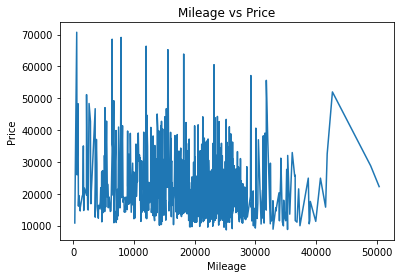

In [ ]:
df.groupby('Mileage')['Price'].mean().plot()
#df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
#transformation using sqrt(x)
import numpy as np
#df['transformed'] = np.power(df['Mileage'],0.5) ##squareroot of x
#df['transformed'] = np.square(df['Mileage'])  ## x ssquare
#df['transformed'] = np.exp(df['Mileage'])  ## exp(x)
#df['transformed'] = np.log(df['Mileage']) ## log(x)
df['transformed'] = np.power(df['Mileage'],3)
#df.plot(x='transformed', y='Chirps/Second', style='o')
#plt.title('Mileage' vs 'Price')
#plt.xlabel('transformed')
#plt.ylabel('Price')
#plt.show()
df[['transformed','Price']].corr()

,transformed,Price
transformed,1.000000,-0.085018
Price,-0.085018,1.000000


1) There is no linear relationship between Mileage and Price 2) Have tried all trasnformations - still not able to see a good linear relationship 3) Have decided to drop the feature



**Part 2**

In [ ]:
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
#Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
#Find the combination of the factors that is the best predictor for price.##

In [ ]:
#mileage and price


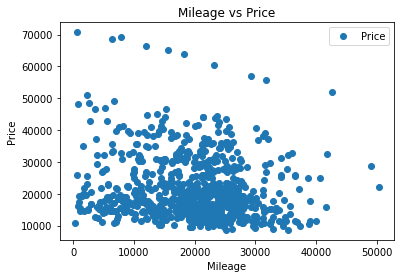

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

There is very low linear relationship between mileage and price

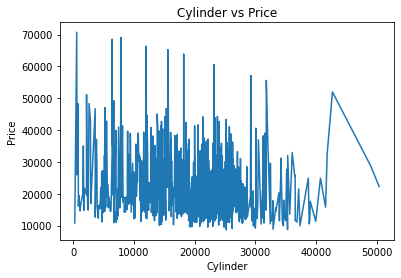

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [ ]:
#Cylinders and price
df.groupby('Mileage')['Price'].mean().plot()
#df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()
df[['Cylinder','Price']].corr()

correlation between cylinder and price is greater than 0.5 so it has high relationship

In [ ]:
df.Cylinder.values

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
X = df.loc[:, ['Cylinder']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
y_test

array([25098.62905715, 16106.82722092, 12333.60399301, 17978.35699778,
       11873.53399479, 42820.32902253, 52001.99437855, 12897.92953692,
       22625.07356605, 35261.43643069, 39713.66792194, 25267.36767604,
       29321.08250619, 13830.24902472, 28291.76226112, 14678.10533441,
       45061.95193515, 15635.79615973, 19446.88294074, 11464.62885878,
       15194.97535407, 15554.28312912, 12099.01457785, 14642.32357743,
       21875.09763083, 15604.14581569, 29961.2549387 , 32649.76050854,
       48310.32954486, 28777.95969479, 18912.98159813, 29197.79130048,
       19924.1590524 , 39875.85425532, 15979.01483676, 26955.04120176,
       19075.6787522 , 17115.12203064, 14401.90692881, 17803.27908854,
       13530.06864492, 13869.15494228, 25790.51414074, 12425.38917116,
       26789.8326082 , 27241.43617796, 14881.95544597, 18490.98302887,
       13585.63680217, 17789.34673081, 18009.84603167, 11699.03391564,
       30646.43770059, 13471.00508276, 12257.16408562, 14116.92150853,
      

In [ ]:
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [ ]:
X_test

array([[6],
       [4],
       [4],
       [6],
       [4],
       [8],
       [8],
       [4],
       [6],
       [8],
       [8],
       [4],
       [4],
       [4],
       [4],
       [4],
       [8],
       [4],
       [6],
       [4],
       [4],
       [6],
       [4],
       [4],
       [6],
       [4],
       [4],
       [4],
       [8],
       [4],
       [6],
       [4],
       [6],
       [8],
       [6],
       [4],
       [6],
       [6],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [6],
       [6],
       [6],
       [6],
       [4],
       [6],
       [4],
       [4],
       [4],
       [6],
       [4],
       [4],
       [8],
       [8],
       [6],
       [4],
       [8],
       [8],
       [6],
       [6],
       [4],
       [6],
       [6],
       [4],
       [4],
       [4],
       [6],
       [4],
       [6],
       [4],
       [6],
       [8],
       [4],
       [4],
       [4],
       [6],
    

In [ ]:
#Modelling
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * Cylinder + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)#value of c(m*feature+c)

25.085211379268003


In [ ]:
print(regressor.coef_)

[4064.66587037]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([24413.0804336 , 16283.74869286, 16283.74869286, 24413.0804336 ,
       16283.74869286, 32542.41217434, 32542.41217434, 16283.74869286,
       24413.0804336 , 32542.41217434, 32542.41217434, 16283.74869286,
       16283.74869286, 16283.74869286, 16283.74869286, 16283.74869286,
       32542.41217434, 16283.74869286, 24413.0804336 , 16283.74869286,
       16283.74869286, 24413.0804336 , 16283.74869286, 16283.74869286,
       24413.0804336 , 16283.74869286, 16283.74869286, 16283.74869286,
       32542.41217434, 16283.74869286, 24413.0804336 , 16283.74869286,
       24413.0804336 , 32542.41217434, 24413.0804336 , 16283.74869286,
       24413.0804336 , 24413.0804336 , 16283.74869286, 16283.74869286,
       16283.74869286, 16283.74869286, 16283.74869286, 16283.74869286,
       16283.74869286, 16283.74869286, 16283.74869286, 24413.0804336 ,
       24413.0804336 , 24413.0804336 , 24413.0804336 , 16283.74869286,
       24413.0804336 , 16283.74869286, 16283.74869286, 16283.74869286,
      

In [ ]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [ ]:
regressor.predict([[7]]) 

array([28477.74630397])

In [ ]:
#R2 score
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3502492815247601


R2 score is greater than 0 it is better model to predict price using cylinder

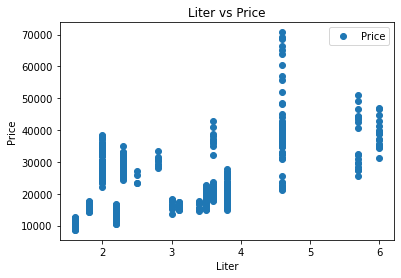

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [ ]:
#Liters and price
#df.groupby('Liter')['Price'].mean().plot()
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()
df[['Liter','Price']].corr()

Linear relation is high between liter and price

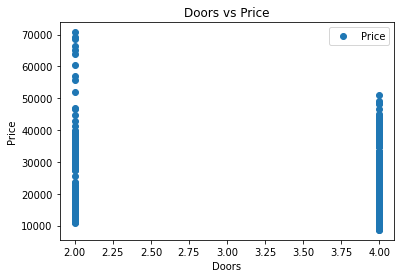

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
##Doors and Price
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors','Price']].corr()

Linear relation between door and price is slightly low

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,555614977861
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,762299535375
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,2297877753536
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,4364310273688
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,7800088698368


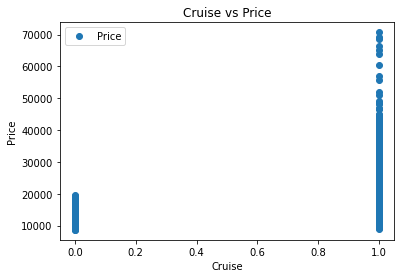

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [ ]:
##Cruise and Price
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()
df[['Cruise','Price']].corr()

Linear relation is high between cruise and price ,so price can be predicted

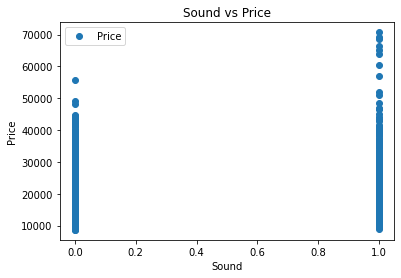

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
##Sound and Price
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['Sound','Price']].corr()

Linear relation between door and price is slightly low and prediction of price is impossible

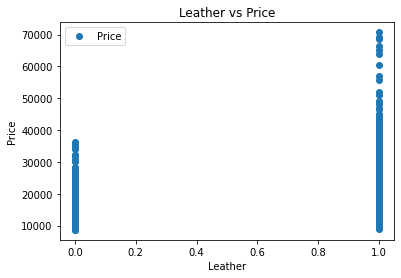

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
##Leather and Price
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()
df[['Leather','Price']].corr()

Linear relation is good between Leather and price ,so price can be predicted

Best Price can be predicted in the basis of Cylinder,Liter Management,Cruise and leather used in car